<a href="https://colab.research.google.com/github/DikshyaL/Learning_ML/blob/main/KNN_classification_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("neurocipher/student-performance")
print("Path to dataset files:", path)
os.listdir(path)

Using Colab cache for faster access to the 'student-performance' dataset.
Path to dataset files: /kaggle/input/student-performance


['StudentPerformance.csv']

In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv(path + "/StudentPerformance.csv")

print(df.head())
print(df.size)
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.columns)

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
60000
(10000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ---

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df["Extracurricular Activities"] = df["Extracurricular Activities"].map({ "Yes": 1, "No": 0 })

df["Pass_Fail"] = np.where(df["Performance Index"]>=40, 1, 0)
features = ["Hours Studied",
            "Previous Scores",
            "Extracurricular Activities",
            "Sleep Hours",
            "Sample Question Papers Practiced"]

X = df[features]
y = df["Pass_Fail"]
print(df.head())
scaler= StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)


   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  Pass_Fail  
0                                 1               91.0          1  
1                                 2               65.0          1  
2                                 2               45.0          1  
3                                 2               36.0          0  
4                                 5               66.0          1  


In [16]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9575
[[ 426   53]
 [  32 1489]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       479
           1       0.97      0.98      0.97      1521

    accuracy                           0.96      2000
   macro avg       0.95      0.93      0.94      2000
weighted avg       0.96      0.96      0.96      2000



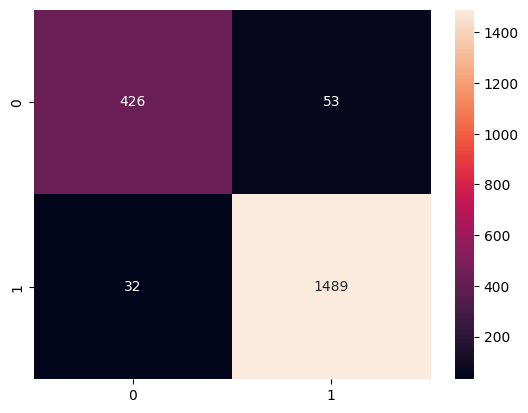

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

